<a href="https://colab.research.google.com/github/LeeSeungwon89/Kaggle_Dacon_Practice/blob/main/1.%20Categorical_Feature_Encoding_Challenge_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

In [24]:
ls -1ha kaggle.json

kaggle.json


In [25]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

# 참가한 대회 리스트를 확인합니다.
# !kaggle competitions list

In [26]:
!kaggle competitions download -c cat-in-the-dat

cat-in-the-dat.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
!ls

 cat-in-the-dat.zip   kaggle.json   sample_submission.csv   train.csv
'kaggle (1).json'     sample_data   test.csv


In [28]:
!unzip cat-in-the-dat.zip

Archive:  cat-in-the-dat.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  A
error:  invalid response [ A]
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# **1. 데이터 준비**

데이터를 준비하겠습니다.

In [29]:
import numpy as np
import pandas as pd

# 최대 행렬 수를 설정합니다.
pd.set_option('display.max_column', 50)
pd.set_option('display.max_rows', 50)

# 데이터를 읽습니다.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# **2. 데이터 확인**

## **2.1. 데이터 개요**

In [30]:
train.head(3)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

일견 결측치는 없어 보입니다. 

In [32]:
train.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,149999.500000,0.127503,0.256607,0.383223,1.479567,3.007817,5.771113,0.30588
std,86602.684716,0.333537,0.436761,0.486173,0.712524,1.817949,3.843519,0.46078
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000
25%,74999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.00000
50%,149999.500000,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.00000
75%,224999.250000,0.000000,1.000000,1.000000,2.000000,4.000000,9.000000,1.00000
max,299999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.00000


연속형 피처가 없기 때문에 `describe()` 메서드로 얻을 만한 유용한 정보는 없습니다. 이 데이터의 모든 피처는 범주형입니다.

In [33]:
test.head(3)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,0870b0a5d,9ceb19dd6,530f8ecc3,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,a5c276589,1ad744242,12e6161c9,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,568550f04,1fe17a1fd,27d6df03f,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      200000 non-null  int64 
 1   bin_0   200000 non-null  int64 
 2   bin_1   200000 non-null  int64 
 3   bin_2   200000 non-null  int64 
 4   bin_3   200000 non-null  object
 5   bin_4   200000 non-null  object
 6   nom_0   200000 non-null  object
 7   nom_1   200000 non-null  object
 8   nom_2   200000 non-null  object
 9   nom_3   200000 non-null  object
 10  nom_4   200000 non-null  object
 11  nom_5   200000 non-null  object
 12  nom_6   200000 non-null  object
 13  nom_7   200000 non-null  object
 14  nom_8   200000 non-null  object
 15  nom_9   200000 non-null  object
 16  ord_0   200000 non-null  int64 
 17  ord_1   200000 non-null  object
 18  ord_2   200000 non-null  object
 19  ord_3   200000 non-null  object
 20  ord_4   200000 non-null  object
 21  ord_5   200000 non-null  object
 

학습 데이터와 다른 점은 'target' 피처가 없는 것입니다. 이외 특이사항은 없어 보입니다.

## **2.2. 피처 개요**

데이터가 가진 피처들의 특징은 아래와 같습니다.

- 인위적으로 생성한 데이터이므로 피처 자체가 특별한 의미를 내포하지 않습니다.

- 피처명에 따라 피처 유형을 세분화합니다. 참고로 모든 피처는 범주형입니다. 연속형 피처는 존재하지 않습니다.

 - 'bin_num': 이진형 피처

 - 'nom_num': 명목형 피처

 - 'ord_num': 순서형 피처('ord_3', 'ord_4', 'ord_5'는 알파벳순)

 - 'day', 'month': 날짜 피처

'id' 피처는 레코드 순서를 나타내는 것으로 보이며, 실제로 예측에 어떠한 영향도 주지 않을 것으로 예상합니다. 고윳값을 확인해 보겠습니다.

In [35]:
train['id'].nunique()

300000

데이터 크기와 동일하게 고윳값이 존재합니다. 'id' 피처는 인덱스로 지정하겠습니다. 물론 피처 자체를 삭제해도 좋습니다.

In [36]:
train = train.set_index('id')
test = test.set_index('id')
submission = submission.set_index('id')

### **2.2.1. 피처 요약**

먼저 모든 피처를 요약하는 함수를 선언하여 피처가 가진 특징을 확인하겠습니다.

In [37]:
def feature_table(df):
    # 데이터 크기를 출력합니다.    
    print(df.shape)
    # 피처 이름과 유형을 담은 데이터프레임을 생성합니다.   
    feature_description = pd.DataFrame(df.dtypes, columns=['type'])
    # 피처 이름 피처가 인덱스이므로 인덱스를 리셋하여 새 인덱스를 만듭니다.
    feature_description = feature_description.reset_index()
    # 피처 이름을 값으로 가진 피처명은 'index'입니다. 'feature'로 변환합니다.
    feature_description = feature_description.rename(columns={'index': 'feature'})
    # 각 피처가 가진 첫 번째 ~ 다섯 번째 값을 출력합니다.
    feature_description['first_value'] = df.loc[0].values
    feature_description['second_value'] = df.loc[1].values
    feature_description['third_value'] = df.loc[2].values
    feature_description['fourth_value'] = df.loc[3].values
    feature_description['fifth_value'] = df.loc[4].values
    # 고윳값 개수를 산출합니다.
    feature_description['eigenvalue_count'] = df.nunique().values
    # 결측치 개수를 산출합니다.
    feature_description['null_count'] = df.isnull().sum().values

    return feature_description

In [38]:
feature_table(train)

(300000, 24)


,feature,type,first_value,second_value,third_value,fourth_value,fifth_value,eigenvalue_count,null_count
0,bin_0,int64,0,0,0,0,0,2,0
1,bin_1,int64,0,1,0,1,0,2,0
2,bin_2,int64,0,0,0,0,0,2,0
3,bin_3,object,T,T,F,F,F,2,0
4,bin_4,object,Y,Y,Y,Y,N,2,0
5,nom_0,object,Green,Green,Blue,Red,Red,3,0
6,nom_1,object,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid,6,0
7,nom_2,object,Snake,Hamster,Lion,Snake,Lion,6,0
8,nom_3,object,Finland,Russia,Russia,Canada,Canada,6,0
9,nom_4,object,Bassoon,Piano,Theremin,Oboe,Oboe,4,0


- 모든 피처에 결측치는 없습니다.

- 'bin_3', 'bin_4' 피처는 0, 1이 아닌 (T, F), (Y, N)으로 구성된 이진형 피처입니다. 각각 1, 0으로 매핑하여 인코딩을 수행할 필요가 있습니다.

- 'nom_1' ~ 'nom_9' 피처는 고윳값이 적은 피처부터 매우 많은 피처까지 다양합니다. 원-핫 인코딩을 적용할 필요가 있습니다. 다만 매우 많은 피처가 생성되어 학습 시간이 오래 걸릴 수 있습니다.

- 'ord_0' ~ 'ord_5' 피처는 고윳값이 적은 피처부터 많은 피처까지 다양합니다. 순서형 피처에 인코딩을 적용하는 경우 순서가 가진 함의를 잃지 않도록 세심하게 접근해야 합니다. OrdinalEncoder를 적용할 만합니다.

- 'day', 'month' 피처는 정숫값으로 구성된 범주형 피처입니다. 그대로 사용해도 무방하지만 원-핫 인코딩을 적용하여 약간의 성능 향상이라도 도모해 볼 수 있을 것입니다. 

- 'target' 피처는 0, 1로 구성된 타깃 피처입니다.

- 모든 피처가 예측에 유효할 것이라는 가정을 두고 최대한 인코딩과 스케일링을 적용하여 예측에 활용해야 합니다. 추후 각 피처를 세부적으로 살펴보는 과정에서 제거해야 할 피처를 발견할 수도 있습니다.

### **2.2.2. bin_number**

이진형 피처는 타깃값 분포를 확인하는 것이 핵심입니다. 먼저 크로스탭을 사용하여 확인해 보겠습니다.

In [50]:
pd.crosstab(index=train['bin_0'], columns=train['target'], margins=True)

target,0,1,All
bin_0,,,
0,181786,79963,261749
1,26450,11801,38251
All,208236,91764,300000


타깃별 데이터 크기 차이가 크므로 분포를 파악하기에 어렵진 않습니다. 여기서 데이터를 아래 테이블처럼 백분율로 바꾸면 분포를 더 쉽게 파악할 수 있습니다.

In [57]:
pd.crosstab(index=train['bin_0'], columns=train['target'], margins=True, normalize=True) * 100

target,0,1,All
bin_0,,,
0,60.595333,26.654333,87.249667
1,8.816667,3.933667,12.750333
All,69.412000,30.588000,100.000000


이 백분율 크로스탭 방식을 구현하는 함수를 선언하여 다른 피처에도 적용하겠습니다.

In [83]:
def crosstab_target(df, feature):
    result = pd.crosstab(index=df[feature], columns=df['target'], margins=True, normalize=True) * 100

    return result

In [78]:
crosstab_target(train, 'bin_0')

target,0,1,All
bin_0,,,
0,60.595333,26.654333,87.249667
1,8.816667,3.933667,12.750333
All,69.412000,30.588000,100.000000


In [79]:
crosstab_target(train, 'bin_1')

target,0,1,All
bin_1,,,
0,49.811333,24.528,74.339333
1,19.600667,6.060,25.660667
All,69.412000,30.588,100.000000


In [80]:
crosstab_target(train, 'bin_2')

target,0,1,All
bin_2,,,
0,43.079333,18.598333,61.677667
1,26.332667,11.989667,38.322333
All,69.412000,30.588000,100.000000


In [81]:
crosstab_target(train, 'bin_3')

target,0,1,All
bin_3,,,
F,33.717,15.104667,48.821667
T,35.695,15.483333,51.178333
All,69.412,30.588000,100.000000


In [82]:
crosstab_target(train, 'bin_4')

target,0,1,All
bin_4,,,
N,24.065667,12.056667,36.122333
Y,45.346333,18.531333,63.877667
All,69.412000,30.588000,100.000000


특이사항은 없어 보입니다. 타깃값 비율은 7:3입니다.

전체 피처를 시각화해 보겠습니다.

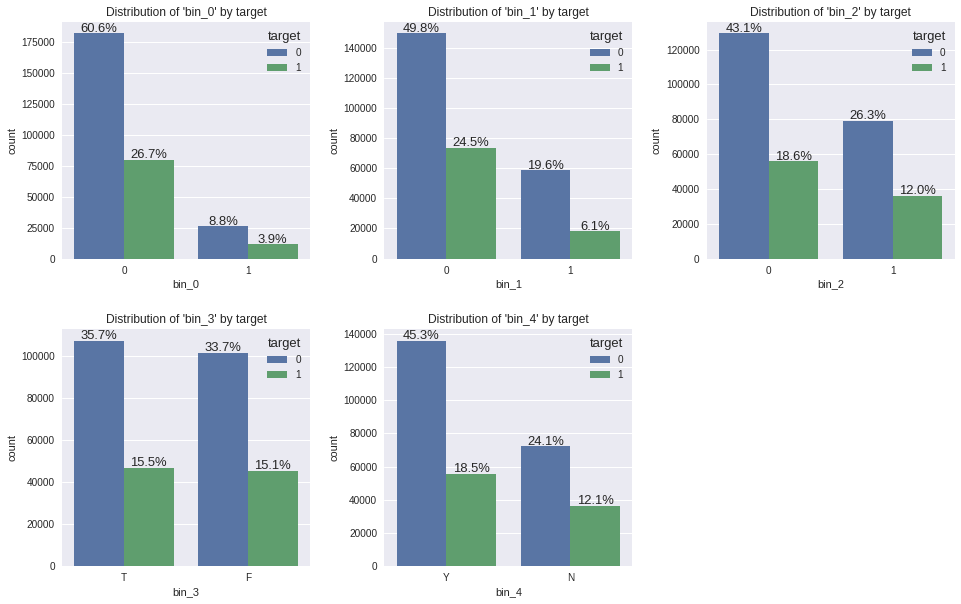

In [89]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grsp # 한 공간에 그래프를 그릴 수 있는 모듈을 읽습니다.
import seaborn as sns
%matplotlib inline

mpl.rc('font', size=13) # 글자 사이즈를 지정합니다.
plt.style.use('seaborn') # 시각화 스타일을 지정합니다.

# 그래프 도형 상단에 비율을 나타내는 함수를 선언합니다.
# `axis`는 행렬상 그래프 위치, `data_volume`은 데이터 크기입니다.
def have_ratio(axis, data_volume):
    for patch in axis.patches: # `patches`는 각 그래프의 도형 객체입니다.
        height = patch.get_height() # 도형의 높이(=데이터 개수)를 추출합니다.
        width = patch.get_width() # 도형의 너비(=x축 길이)를 추출합니다.
        left_corner_point = patch.get_x() # 도형의 왼쪽 하단 모서리의 x위치를 추출합니다.
        ratio = (height/data_volume) * 100 # 전체 데이터를 값 개수로 나누고 100을 곱하여 비율을 산출합니다.

        # 비율을 명시할 위치 및 비율 형태를 지정합니다.
        # x축 위치: 도형의 왼쪽 하단 모서리 x위치에 너비를 더하고 2로 나누어 중간 지점을 도출합니다.
        # y축 위치: 도형의 높이에 '데이터 개수 * 0.003'을 더하여 도형 바로 윗지점을 도출합니다.
        # 데이터 개수를 지정하는 이유는 데이터 개수가 달라도 도형 위 지점을 알맞게 지정하기 위함입니다.
        axis.text(x=left_corner_point + (width/2), y=height + (data_volume * 0.003),
                s=f'{ratio:1.1f}%', ha='center') 
# 함수 끝

# 시각화합니다.
grid = grsp.GridSpec(2, 3) # 그리드 형태의 행, 열을 지정합니다.
plt.figure(figsize=(16, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3) # 좌우 여백을 지정합니다.

bin_nums = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']
for index, feature in enumerate(bin_nums):
    axis = plt.subplot(grid[index]) # 그래프 축을 지정합니다.

    sns.countplot(x=feature, data=train, hue='target', ax=axis)
    have_ratio(axis, len(train)) # 선언한 함수를 사용하여 비율을 표시합니다.
    axis.set_title(f'Distribution of \'{feature}\' by target')

모든 피처에서 타깃값 0의 비율이 큰 폭으로 높은 것을 확인할 수 있습니다. 참고로 타깃값 비율 차이가 크지 않은 피처는 타깃값 예측에 유효하지 않은 피처라고 판단할 수 있습니다. 여기서는 모든 피처의 타깃값 차이가 크기 때문에 모든 피처를 예측에 적용할 만합니다.

### **2.2.3. nom_number**

명목형 피처를 확인해 보겠습니다. 파악하는 방식은 위와 유사하지만 'nom_5 ~ 9' 피처는 고윳값이 많으므로 위 방식을 적용하기엔 무리가 있습니다. 먼저 'nom_4' 피처까지만 파악해 보겠습니다.

In [84]:
crosstab_target(train, 'nom_0')

target,0,1,All
nom_0,,,
Blue,24.304667,7.750667,32.055333
Green,28.560667,13.886333,42.447000
Red,16.546667,8.951000,25.497667
All,69.412000,30.588000,100.000000


In [85]:
crosstab_target(train, 'nom_1')

target,0,1,All
nom_1,,,
Circle,9.384000,3.056000,12.440000
Polygon,8.247000,3.800667,12.047667
Square,10.929000,5.603333,16.532333
Star,10.548333,4.753000,15.301333
Trapezoid,23.944333,9.782667,33.727000
Triangle,6.359333,3.592333,9.951667
All,69.412000,30.588000,100.000000


In [86]:
crosstab_target(train, 'nom_2')

target,0,1,All
nom_2,,,
Axolotl,8.202667,3.842667,12.045333
Cat,11.001667,5.551333,16.553000
Dog,9.421667,3.059667,12.481333
Hamster,6.298333,3.530667,9.829000
Lion,23.869000,9.896000,33.765000
Snake,10.618667,4.707667,15.326333
All,69.412000,30.588000,100.000000


In [87]:
crosstab_target(train, 'nom_3')

target,0,1,All
nom_3,,,
Canada,10.992667,5.657667,16.650333
China,10.563667,4.784333,15.348000
Costa Rica,8.221000,3.775000,11.996000
Finland,9.324000,2.990000,12.314000
India,6.376667,3.607333,9.984000
Russia,23.934000,9.773667,33.707667
All,69.412000,30.588000,100.000000


In [88]:
crosstab_target(train, 'nom_4')

target,0,1,All
nom_4,,,
Bassoon,17.391667,5.424333,22.816000
Oboe,20.628333,10.136000,30.764333
Piano,19.603333,8.569000,28.172333
Theremin,11.788667,6.458667,18.247333
All,69.412000,30.588000,100.000000


일견 특이사항은 없을 것으로 판단합니다.

시각화해 보겠습니다.

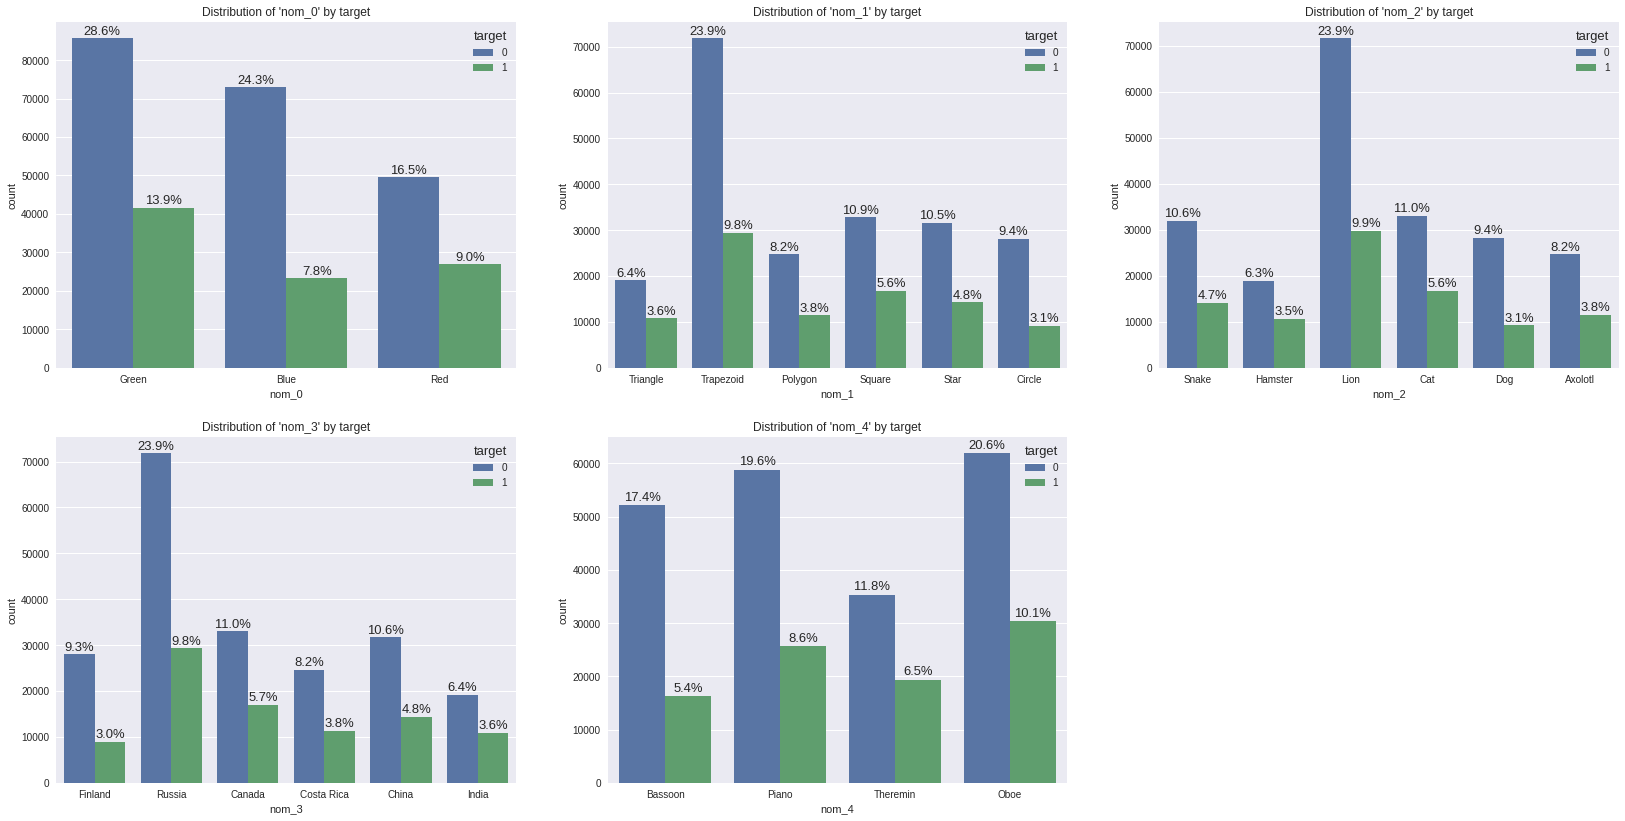

In [99]:
grid = grsp.GridSpec(2, 3) # 그리드 형태의 행, 열을 지정합니다.
plt.figure(figsize=(28, 14))
plt.subplots_adjust(wspace=0.2, hspace=0.2) # 좌우 여백을 지정합니다.

nom_nums = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
for index, feature in enumerate(nom_nums):
    axis = plt.subplot(grid[index]) # 그래프 축을 지정합니다.

    sns.countplot(x=feature, data=train, hue='target', ax=axis)
    have_ratio(axis, len(train)) # 선언한 함수를 사용하여 비율을 표시합니다.
    axis.set_title(f'Distribution of \'{feature}\' by target')



---

업데이트 중

---



### **2.2.4. ord_number**

### **2.2.5. day, month**

### **2.2.6. target**

위 피처들을 살펴보면서 타깃값에 대한 정보를 확인했습니다. 타깃값 0과 1은 7:3 비율을 보입니다.

# **3. 결론**